In [1]:
import cv2
import numpy as np
import operator
import sys, os
import tensorflow as tf 
import matplotlib.pyplot as plt 

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, Model
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D 
from keras import applications  
from keras.utils.np_utils import to_categorical


In [2]:
# Create folder to store dataset
if not os.path.exists("data2"):
    os.makedirs("data2")
    os.makedirs("data2/train")
    os.makedirs("data2/test")
    os.makedirs("data2/train/A")
    os.makedirs("data2/train/B")
    os.makedirs("data2/train/C")
    os.makedirs("data2/train/D")
    os.makedirs("data2/train/E")
    os.makedirs("data2/train/F")
    os.makedirs("data2/train/G")
    os.makedirs("data2/train/H")
    os.makedirs("data2/train/I")
    os.makedirs("data2/train/K")
    os.makedirs("data2/train/L")
    os.makedirs("data2/train/M")
    os.makedirs("data2/train/N")
    os.makedirs("data2/train/O")
    os.makedirs("data2/train/P")
    os.makedirs("data2/train/Q")
    os.makedirs("data2/train/R")
    os.makedirs("data2/train/S")
    os.makedirs("data2/train/T")
    os.makedirs("data2/train/U")
    os.makedirs("data2/train/V")
    os.makedirs("data2/train/W")
    os.makedirs("data2/train/X")
    os.makedirs("data2/train/Y") 
    os.makedirs("data2/test/A")
    os.makedirs("data2/test/B")
    os.makedirs("data2/test/C")
    os.makedirs("data2/test/D")
    os.makedirs("data2/test/E")
    os.makedirs("data2/test/F")
    os.makedirs("data2/test/G")
    os.makedirs("data2/test/H")
    os.makedirs("data2/test/I")
    os.makedirs("data2/test/K")
    os.makedirs("data2/test/L")
    os.makedirs("data2/test/M")
    os.makedirs("data2/test/N")
    os.makedirs("data2/test/O")
    os.makedirs("data2/test/P")
    os.makedirs("data2/test/Q")
    os.makedirs("data2/test/R")
    os.makedirs("data2/test/S")
    os.makedirs("data2/test/T")
    os.makedirs("data2/test/U")
    os.makedirs("data2/test/V")
    os.makedirs("data2/test/W")
    os.makedirs("data2/test/X")
    os.makedirs("data2/test/Y")
    os.makedirs("data2/valid/A")
    os.makedirs("data2/valid/B")
    os.makedirs("data2/valid/C")
    os.makedirs("data2/valid/D")
    os.makedirs("data2/valid/E")
    os.makedirs("data2/valid/F")
    os.makedirs("data2/valid/G")
    os.makedirs("data2/valid/H")
    os.makedirs("data2/valid/I")
    os.makedirs("data2/valid/K")
    os.makedirs("data2/valid/L")
    os.makedirs("data2/valid/M")
    os.makedirs("data2/valid/N")
    os.makedirs("data2/valid/O")
    os.makedirs("data2/valid/P")
    os.makedirs("data2/valid/Q")
    os.makedirs("data2/valid/R")
    os.makedirs("data2/valid/S")
    os.makedirs("data2/valid/T")
    os.makedirs("data2/valid/U")
    os.makedirs("data2/valid/V")
    os.makedirs("data2/valid/W")
    os.makedirs("data2/valid/X")
    os.makedirs("data2/valid/Y")

In [5]:
# Train or test 
mode = 'train'
directory = 'data2/'+mode+'/'


cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv2.flip(frame, 1)
    
    # Getting count of existing images
    count = {'A': len(os.listdir(directory+"/A")),
             'B': len(os.listdir(directory+"/B")),
             'C': len(os.listdir(directory+"/C")),
             'D': len(os.listdir(directory+"/D")),
             'E': len(os.listdir(directory+"/E")),
             'F': len(os.listdir(directory+"/F")),
             'G': len(os.listdir(directory+"/G")),
             'H': len(os.listdir(directory+"/H")),
             'I': len(os.listdir(directory+"/I")),
             'K': len(os.listdir(directory+"/K")),
             'L': len(os.listdir(directory+"/L")),
             'M': len(os.listdir(directory+"/M")),
             'N': len(os.listdir(directory+"/N")),
             'O': len(os.listdir(directory+"/O")),
             'P': len(os.listdir(directory+"/P")),
             'Q': len(os.listdir(directory+"/Q")),
             'R': len(os.listdir(directory+"/R")),
             'S': len(os.listdir(directory+"/S")),
             'T': len(os.listdir(directory+"/T")),
             'U': len(os.listdir(directory+"/U")),
             'V': len(os.listdir(directory+"/V")),
             'W': len(os.listdir(directory+"/W")),
             'X': len(os.listdir(directory+"/X")),
             'Y': len(os.listdir(directory+"/Y")),}
    
    # Printing the count in each set to the screen
    cv2.putText(frame, "MODE : "+mode, (10, 50), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    cv2.putText(frame, "IMAGE COUNT", (10, 100), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    
    cv2.putText(frame, "A : "+str(count['A']), (10, 120), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    cv2.putText(frame, "B : "+str(count['B']), (10, 140), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    cv2.putText(frame, "C : "+str(count['C']), (10, 160), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    cv2.putText(frame, "D : "+str(count['D']), (10, 180), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    cv2.putText(frame, "E : "+str(count['E']), (10, 200), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    cv2.putText(frame, "F : "+str(count['F']), (10, 220), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    cv2.putText(frame, "G : "+str(count['G']), (10, 240), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    cv2.putText(frame, "H : "+str(count['H']), (10, 260), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    cv2.putText(frame, "I : "+str(count['I']), (10, 280), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)  
    cv2.putText(frame, "K : "+str(count['K']), (10, 300), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    cv2.putText(frame, "L : "+str(count['L']), (10, 320), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    cv2.putText(frame, "M : "+str(count['M']), (10, 340), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
    
    
#     cv2.putText(frame, "N : "+str(count['N']), (10, 120), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
#     cv2.putText(frame, "O : "+str(count['O']), (10, 140), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)    
#     cv2.putText(frame, "P : "+str(count['P']), (10, 160), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
#     cv2.putText(frame, "Q : "+str(count['Q']), (10, 180), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
#     cv2.putText(frame, "R : "+str(count['R']), (10, 200), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
#     cv2.putText(frame, "S : "+str(count['S']), (10, 220), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
#     cv2.putText(frame, "T : "+str(count['T']), (10, 240), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
#     cv2.putText(frame, "U : "+str(count['U']), (10, 260), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
#     cv2.putText(frame, "V : "+str(count['V']), (10, 280), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1) 
#     cv2.putText(frame, "W : "+str(count['W']), (10, 300), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
#     cv2.putText(frame, "X : "+str(count['X']), (10, 320), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
#     cv2.putText(frame, "Y : "+str(count['Y']), (10, 340), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255), 1)
   
    # Coordinates of the ROI
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,255,0) ,1)
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    roi = cv2.resize(roi, (128, 128)) 
 
    cv2.imshow("Frame", frame)
    
    
    # do the processing after capturing the image!
#     roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB) #Change to RGB
#     _, roi = cv2.threshold(roi, 120, 255, cv2.THRESH_BINARY)
    cv2.imshow("ROI", roi)
    
    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
        break
    if interrupt & 0xFF == ord('a'):
        cv2.imwrite(directory+'A/'+str(count['A'])+'.jpg', roi)
    if interrupt & 0xFF == ord('b'):
        cv2.imwrite(directory+'B/'+str(count['B'])+'.jpg', roi)
    if interrupt & 0xFF == ord('c'):
        cv2.imwrite(directory+'C/'+str(count['C'])+'.jpg', roi)
    if interrupt & 0xFF == ord('d'):
        cv2.imwrite(directory+'D/'+str(count['D'])+'.jpg', roi)
    if interrupt & 0xFF == ord('e'):
        cv2.imwrite(directory+'E/'+str(count['E'])+'.jpg', roi)
    if interrupt & 0xFF == ord('f'):
        cv2.imwrite(directory+'F/'+str(count['F'])+'.jpg', roi)
    if interrupt & 0xFF == ord('g'):
        cv2.imwrite(directory+'G/'+str(count['G'])+'.jpg', roi)
    if interrupt & 0xFF == ord('h'):
        cv2.imwrite(directory+'H/'+str(count['H'])+'.jpg', roi)
    if interrupt & 0xFF == ord('i'):
        cv2.imwrite(directory+'I/'+str(count['I'])+'.jpg', roi)
    if interrupt & 0xFF == ord('k'):
        cv2.imwrite(directory+'K/'+str(count['K'])+'.jpg', roi)
    if interrupt & 0xFF == ord('l'):
        cv2.imwrite(directory+'L/'+str(count['L'])+'.jpg', roi)
    if interrupt & 0xFF == ord('m'):
        cv2.imwrite(directory+'M/'+str(count['M'])+'.jpg', roi)
    if interrupt & 0xFF == ord('n'):
        cv2.imwrite(directory+'N/'+str(count['N'])+'.jpg', roi)
    if interrupt & 0xFF == ord('o'):
        cv2.imwrite(directory+'O/'+str(count['O'])+'.jpg', roi)
    if interrupt & 0xFF == ord('p'):
        cv2.imwrite(directory+'P/'+str(count['P'])+'.jpg', roi)
    if interrupt & 0xFF == ord('q'):
        cv2.imwrite(directory+'Q/'+str(count['Q'])+'.jpg', roi)
    if interrupt & 0xFF == ord('r'):
        cv2.imwrite(directory+'R/'+str(count['R'])+'.jpg', roi)
    if interrupt & 0xFF == ord('s'):
        cv2.imwrite(directory+'S/'+str(count['S'])+'.jpg', roi)
    if interrupt & 0xFF == ord('t'):
        cv2.imwrite(directory+'T/'+str(count['T'])+'.jpg', roi)
    if interrupt & 0xFF == ord('u'):
        cv2.imwrite(directory+'U/'+str(count['U'])+'.jpg', roi)
    if interrupt & 0xFF == ord('v'):
        cv2.imwrite(directory+'V/'+str(count['V'])+'.jpg', roi)
    if interrupt & 0xFF == ord('w'):
        cv2.imwrite(directory+'W/'+str(count['W'])+'.jpg', roi)
    if interrupt & 0xFF == ord('x'):
        cv2.imwrite(directory+'X/'+str(count['X'])+'.jpg', roi)
    if interrupt & 0xFF == ord('y'):
        cv2.imwrite(directory+'Y/'+str(count['Y'])+'.jpg', roi)
cap.release()
cv2.destroyAllWindows()

In [29]:
roi.shape

(128, 128, 3)

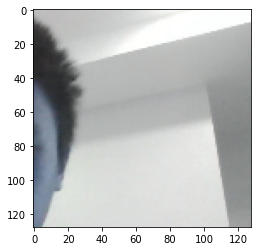

In [30]:
plt.imshow(roi)

In [31]:
test_img = image.load_img('data2/train/F/303.jpg', target_size=(128, 128))

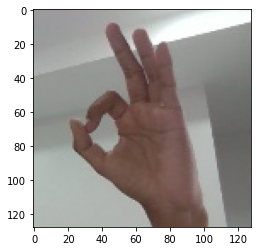

In [36]:
plt.imshow(test_img)

In [14]:
#Set the template of parameter for each image that we're going to import
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split = 0.2)

#----------------------------------Train Data----------------------------------
train_generator = train_datagen.flow_from_directory('data2/train',
                                                     target_size = (128,128),
                                                     batch_size = 32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')
#We set class mode to categorial since we have multiple classes. 
#We also set the subset to training because we're going to use this data set for training.

#----------------------------------Validate Data----------------------------------
validation_generator = train_datagen.flow_from_directory('data2/valid',
                                                     target_size = (128,128),
                                                     batch_size = 32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')
#We set class mode to categorial just like train data. 
#We also set the subset to validation because we're going to use this data set for validating the training data.

#----------------------------------Test Data----------------------------------
test_generator = train_datagen.flow_from_directory('data2/test',
                                                     target_size = (128,128),
                                                     batch_size = 32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')
# We set class mode to categorial just like train data. 
#We also set the subset to validation because we're going to use this data set for validating the training data.

Found 3840 images belonging to 24 classes.
Found 96 images belonging to 24 classes.
Found 96 images belonging to 24 classes.


In [15]:
x,y = test_generator.next()
x.shape

(5, 128, 128, 3)

In [4]:
base_model = ResNet50(include_top=False, 
                      weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(train_generator.num_classes, 
                    activation= 'softmax')(x)

model = Model(inputs = base_model.input, 
              outputs = predictions)

for layer in base_model.layers:
    layer.trainable = False

#Start Training the Model
model.compile(optimizer='adam', 
              loss= 'categorical_crossentropy', 
              metrics = ['accuracy'])

history = model.fit(train_generator,
                    epochs = 20,
                    validation_data = validation_generator)

print(history.history.keys())

Epoch 1/20
604/604 [==============================] - 534s 869ms/step - loss: 0.1706 - accuracy: 0.9610 - val_loss: 0.1595 - val_accuracy: 0.9531
Epoch 2/20
604/604 [==============================] - 550s 911ms/step - loss: 0.0265 - accuracy: 0.9927 - val_loss: 0.1096 - val_accuracy: 0.9729
Epoch 3/20
604/604 [==============================] - 525s 870ms/step - loss: 0.0320 - accuracy: 0.9895 - val_loss: 0.1364 - val_accuracy: 0.9698
Epoch 4/20
604/604 [==============================] - 494s 818ms/step - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.0363 - val_accuracy: 0.9875
Epoch 5/20
604/604 [==============================] - 489s 810ms/step - loss: 0.0285 - accuracy: 0.9919 - val_loss: 0.2292 - val_accuracy: 0.9469
Epoch 6/20
604/604 [==============================] - 490s 812ms/step - loss: 0.0204 - accuracy: 0.9944 - val_loss: 0.0934 - val_accuracy: 0.9729
Epoch 7/20
604/604 [==============================] - 501s 830ms/step - loss: 0.0208 - accuracy: 0.9938 - val_loss: 0.1801 -

In [5]:
# Saving the model
model.save('Trained_Model_30k.h5')

In [6]:
# Loading the model
trained_model = tf.keras.models.load_model('Trained_Model_30k.h5')
print("Loaded model from disk")

Loaded model from disk


In [7]:
test_model = trained_model
test_model.compile(optimizer='adam', 
                  loss= 'categorical_crossentropy', 
                  metrics = ['accuracy'])

In [9]:
#(Accuracy and Loss)
loss_score, accuracy_score = model.evaluate(test_generator, verbose = 2)
print("\n Test Loss:", loss_score) #Loss
print("\n Test Accuracy:", accuracy_score) #Accuracy

30/30 - 26s - loss: 0.1719 - accuracy: 0.9781 - 26s/epoch - 861ms/step

 Test Loss: 0.17186647653579712

 Test Accuracy: 0.9781249761581421


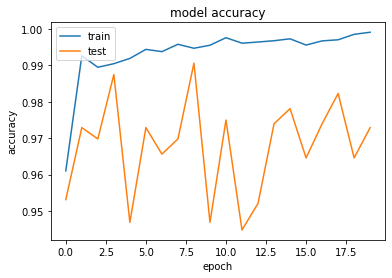

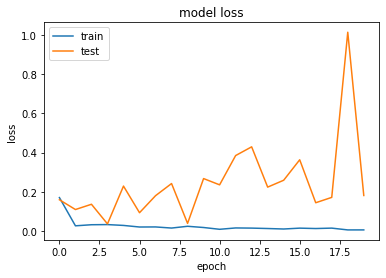

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

Predicted Class [2]


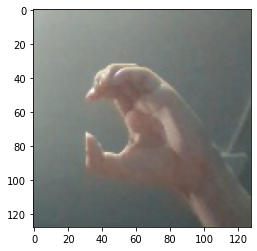

In [12]:
test_img = image.load_img('data2/test/C/2.jpg', target_size=(128, 128))
x_test = image.img_to_array(test_img)
x_test = np.expand_dims(x_test, axis=0)

plt.imshow(test_img)

images = np.vstack([x_test])
classes = test_model.predict(images, batch_size=1)
classes = np.argmax(classes,axis=1)

print("Predicted Class",classes)

In [13]:
type(classes)

numpy.ndarray